In [768]:
import pandas as pd

df = pd.read_csv('social_network_ads.csv')
df.drop(columns=["User ID"], inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [769]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [770]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [771]:
df.shape

(400, 4)

In [772]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [773]:
df = remove_outliers(df, "Age")
df = remove_outliers(df, "EstimatedSalary")
df.shape

(400, 4)

In [774]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [775]:
numeric_df.mean()

Age                   37.6550
EstimatedSalary    69742.5000
Purchased              0.3575
dtype: float64

In [776]:
numeric_df.std()

Age                   10.482877
EstimatedSalary    34096.960282
Purchased              0.479864
dtype: float64

In [777]:
numeric_df.mode()

,Age,EstimatedSalary,Purchased
0,35,72000,0


In [778]:
numeric_df.median()

Age                   37.0
EstimatedSalary    70000.0
Purchased              0.0
dtype: float64

In [779]:
import seaborn as sns
import matplotlib.pyplot as plt

In [780]:

correlation_matrix = df.corr(numeric_only=True)
correlation_matrix["Purchased"]

Age                0.622454
EstimatedSalary    0.362083
Purchased          1.000000
Name: Purchased, dtype: float64

<Axes: >

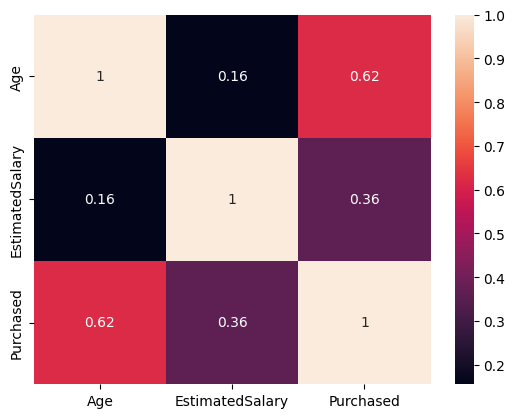

In [781]:
sns.heatmap(correlation_matrix, annot=True)

<Axes: xlabel='Gender', ylabel='Count'>

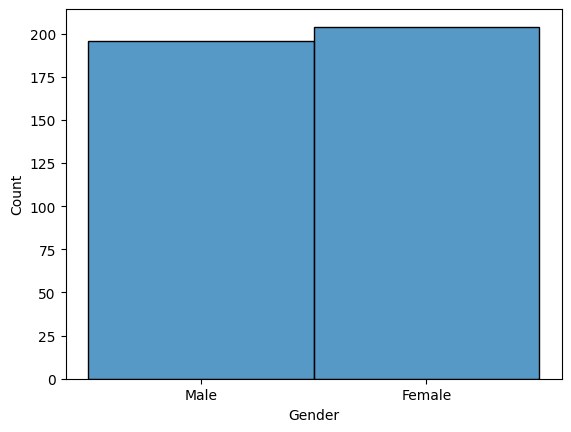

In [782]:
sns.histplot(df, x="Gender")

<Axes: xlabel='Age', ylabel='Count'>

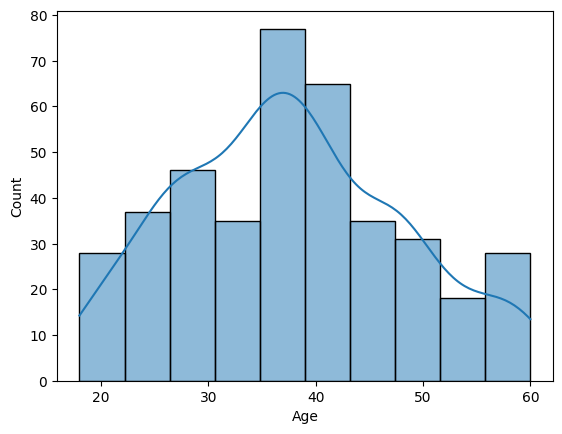

In [783]:
sns.histplot(df, x="Age", kde=True)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

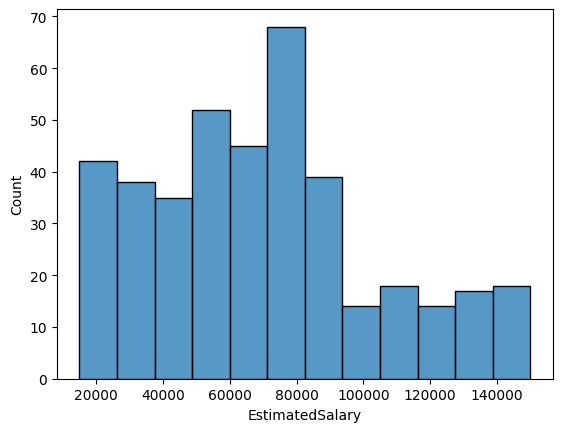

In [784]:
sns.histplot(df, x="EstimatedSalary")

<Axes: xlabel='Purchased', ylabel='count'>

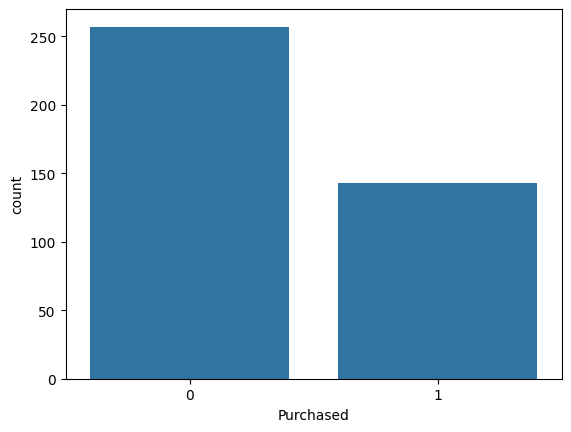

In [785]:
sns.countplot(df, x="Purchased")

<Axes: xlabel='Purchased', ylabel='Age'>

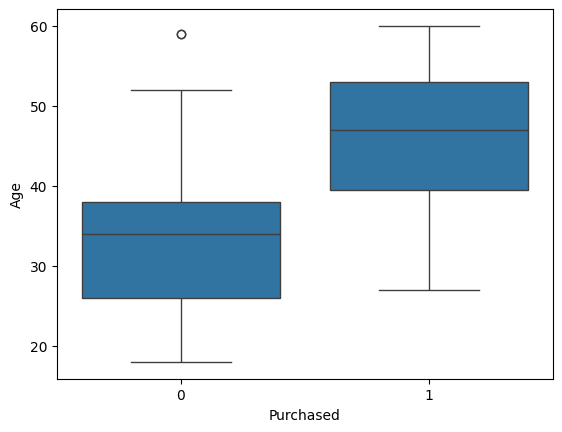

In [786]:
sns.boxplot(df, x="Purchased", y="Age")

In [787]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [788]:
X = df.select_dtypes(include="number").drop(columns=["Purchased"]).values
y = df["Purchased"].values


X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [789]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [790]:
y_pred = model.predict(X_test)

<Axes: >

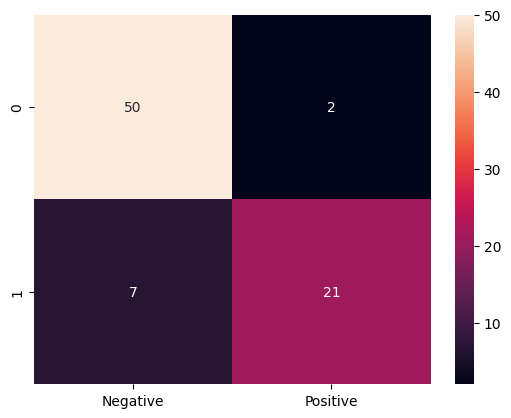

In [791]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_true=y_test, y_pred=y_pred) 
sns.heatmap(cm, annot=True, xticklabels=["Negative", "Positive"])